# Setup

In [20]:
import os
import numpy as np

import matplotlib.pyplot as plt
import glob
import cv2
import pickle
from keras.models import Model
from keras.applications.vgg16 import VGG16
from tensorflow.keras.preprocessing.image import img_to_array

# Load Data

In [46]:

predicted_chips = glob.glob("/content/drive/MyDrive/Omdena/RAMP_HOME/ramp-data/TRAIN/HOTOSM/4/val-labels-predicted3/*.tif")
predicted_chips.sort()

predicted_img = [cv2.imread(image, 1) for image in predicted_chips]
predicted_dataset = np.array(predicted_img)    

In [47]:
  
training_mask = glob.glob("/content/drive/MyDrive/Omdena/RAMP_HOME/ramp-data/TRAIN/HOTOSM/4/val-binarymasks/*.tif")
training_mask.sort()

masks = [cv2.imread(mask, 0) for mask in training_mask]
mask_dataset = np.array(masks)    

In [48]:
print("Total images in the predicted dataset are: ", len(predicted_dataset))
print("Total images in the mask dataset are: ", len(mask_dataset))
print("Predicted data shape is: ", predicted_dataset.shape)
print("Mask data shape is: ", mask_dataset.shape)
print("Labels in predicted is: ", np.unique(predicted_dataset))
print("Labels in the mask are : ", np.unique(mask_dataset))

Total images in the predicted dataset are:  12
Total images in the mask dataset are:  12
Predicted data shape is:  (12, 256, 256, 3)
Mask data shape is:  (12, 256, 256)
Labels in predicted is:  [0 1]
Labels in the mask are :  [0 1]


In [49]:
print(mask_dataset.shape)

(12, 256, 256)


In [50]:
y_test = mask_dataset.reshape(-1)
print(y_test.shape)

(786432,)


In [51]:
print(predicted_dataset.shape)

(12, 256, 256, 3)


In [52]:
predicted_dataset = predicted_dataset[:,:,:,0]
print(predicted_dataset.shape)

(12, 256, 256)


In [53]:
y_pred = predicted_dataset.reshape(-1)
print(y_pred.shape)

(786432,)


<AxesSubplot:>

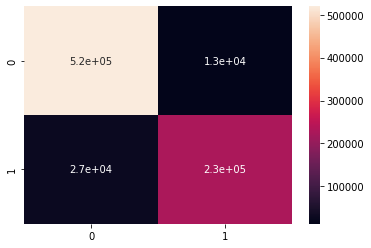

In [54]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)
# print(cm)
sns.heatmap(cm, annot=True)

In [55]:
from sklearn import metrics

print("Accuracy = ", metrics.accuracy_score(y_test, y_pred))

Accuracy =  0.94921875


In [56]:
from keras.metrics import MeanIoU

# Using built in keras function

n_classes = 2
IOU_keras = MeanIoU(num_classes=n_classes)
IOU_keras.update_state(y_test, y_pred)
print("Mean IoU =", IOU_keras.result().numpy())

Mean IoU = 0.8895243
